# Import

In [1]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, cohen_kappa_score
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.svm import SVC

from xgboost import XGBClassifier

from scipy import stats

# Data

In [2]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets

# Exploratory Data Analysis

In [3]:
pd.concat([X, y], axis=1).head().T

,0,1,2,3,4
Marital Status,1,1,1,1,2
Application mode,17,15,1,17,39
Application order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime/evening attendance,1,1,1,1,0
Previous qualification,1,1,1,1,1
Previous qualification (grade),122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mother's qualification,19,1,37,38,37
Father's qualification,12,3,37,37,38


In [4]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


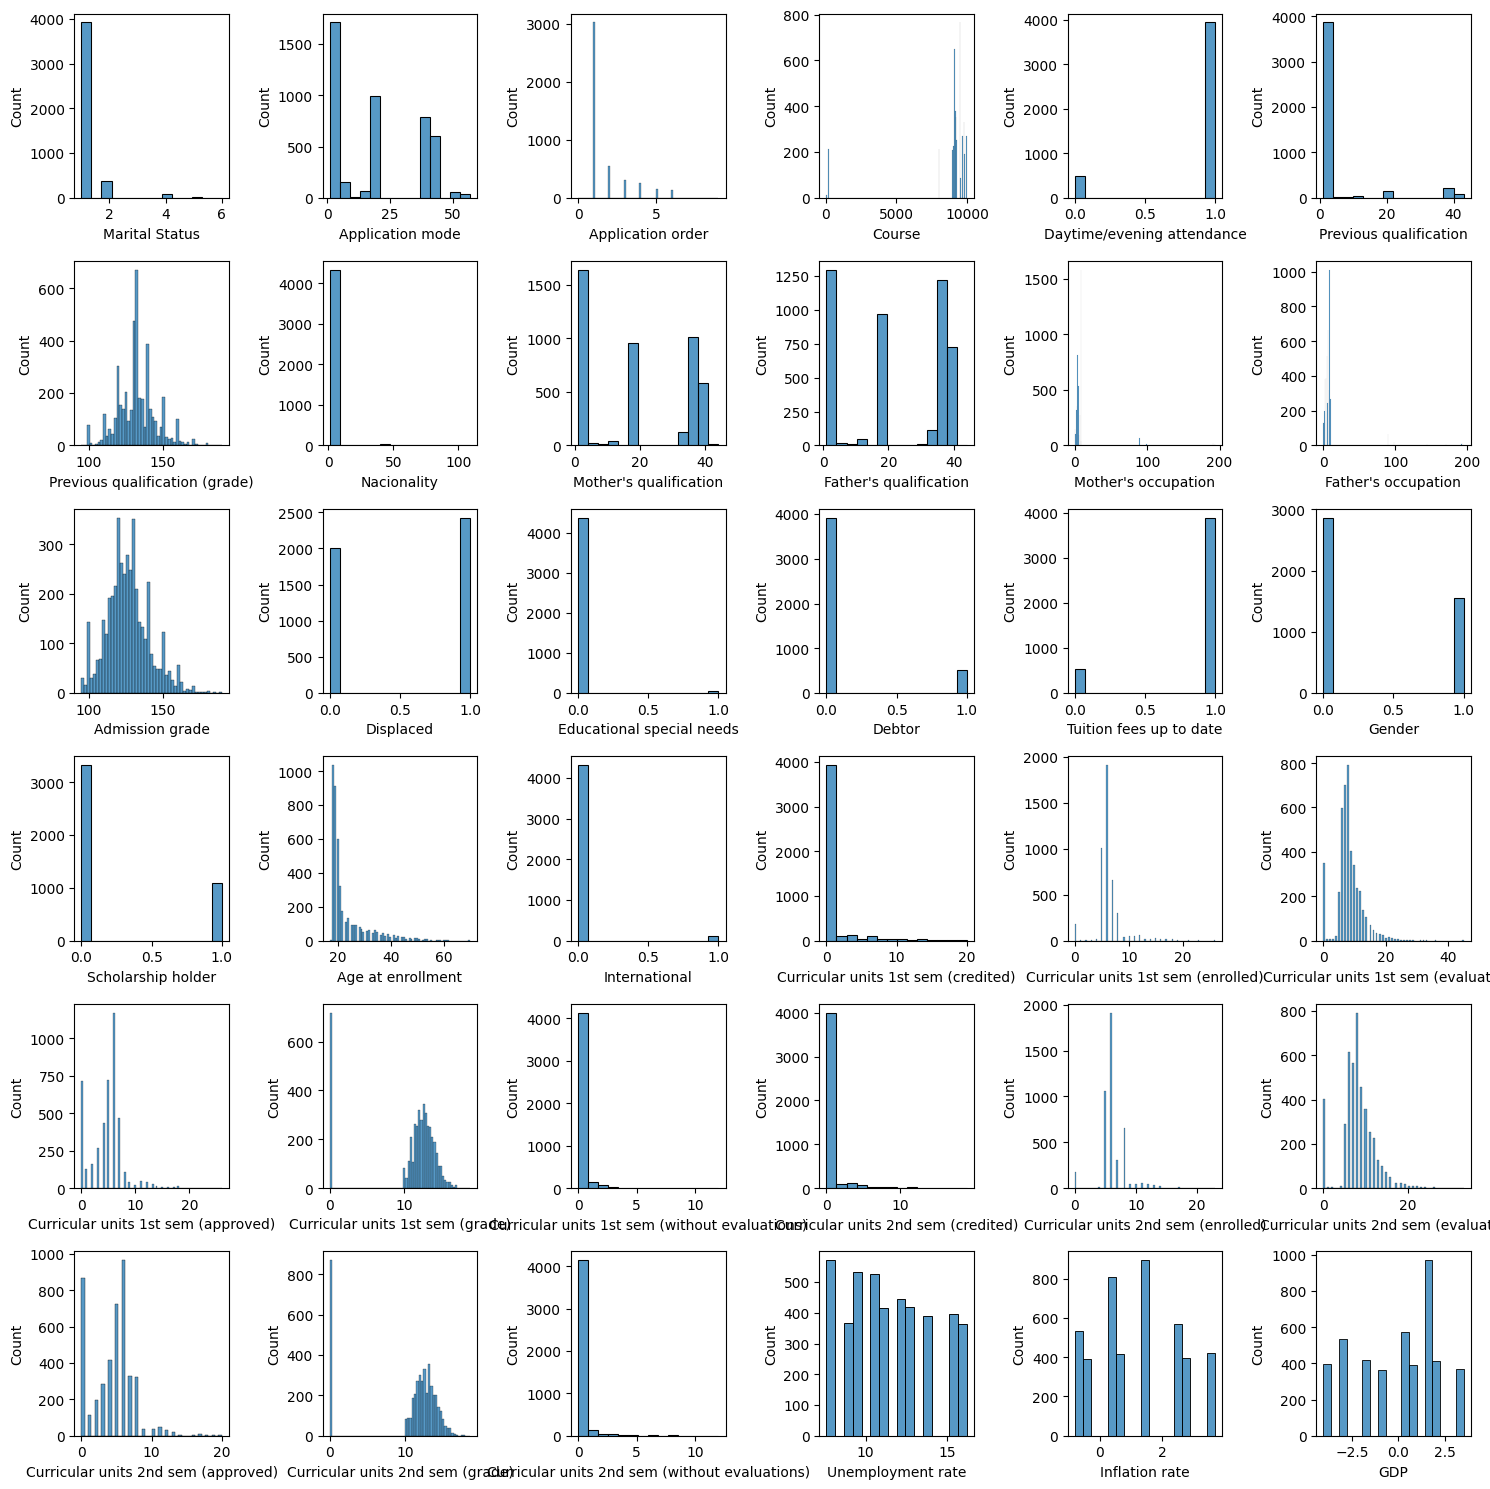

In [5]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))

axes = axes.flatten()
for i, col in enumerate(X.columns):
    sns.histplot(X[col], ax=axes[i])

plt.tight_layout()

In [6]:
col_ohe = [
    'Marital Status',
    'Application mode',
    'Course',
    'Previous qualification',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
]

col_std_scale = [
    'Previous qualification (grade)',
    'Admission grade',
]

col_pt_scale = [
    'Application order',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
]

col_qt_scale = [
    'Unemployment rate',
    'Inflation rate',
    'GDP',
]

<Axes: >

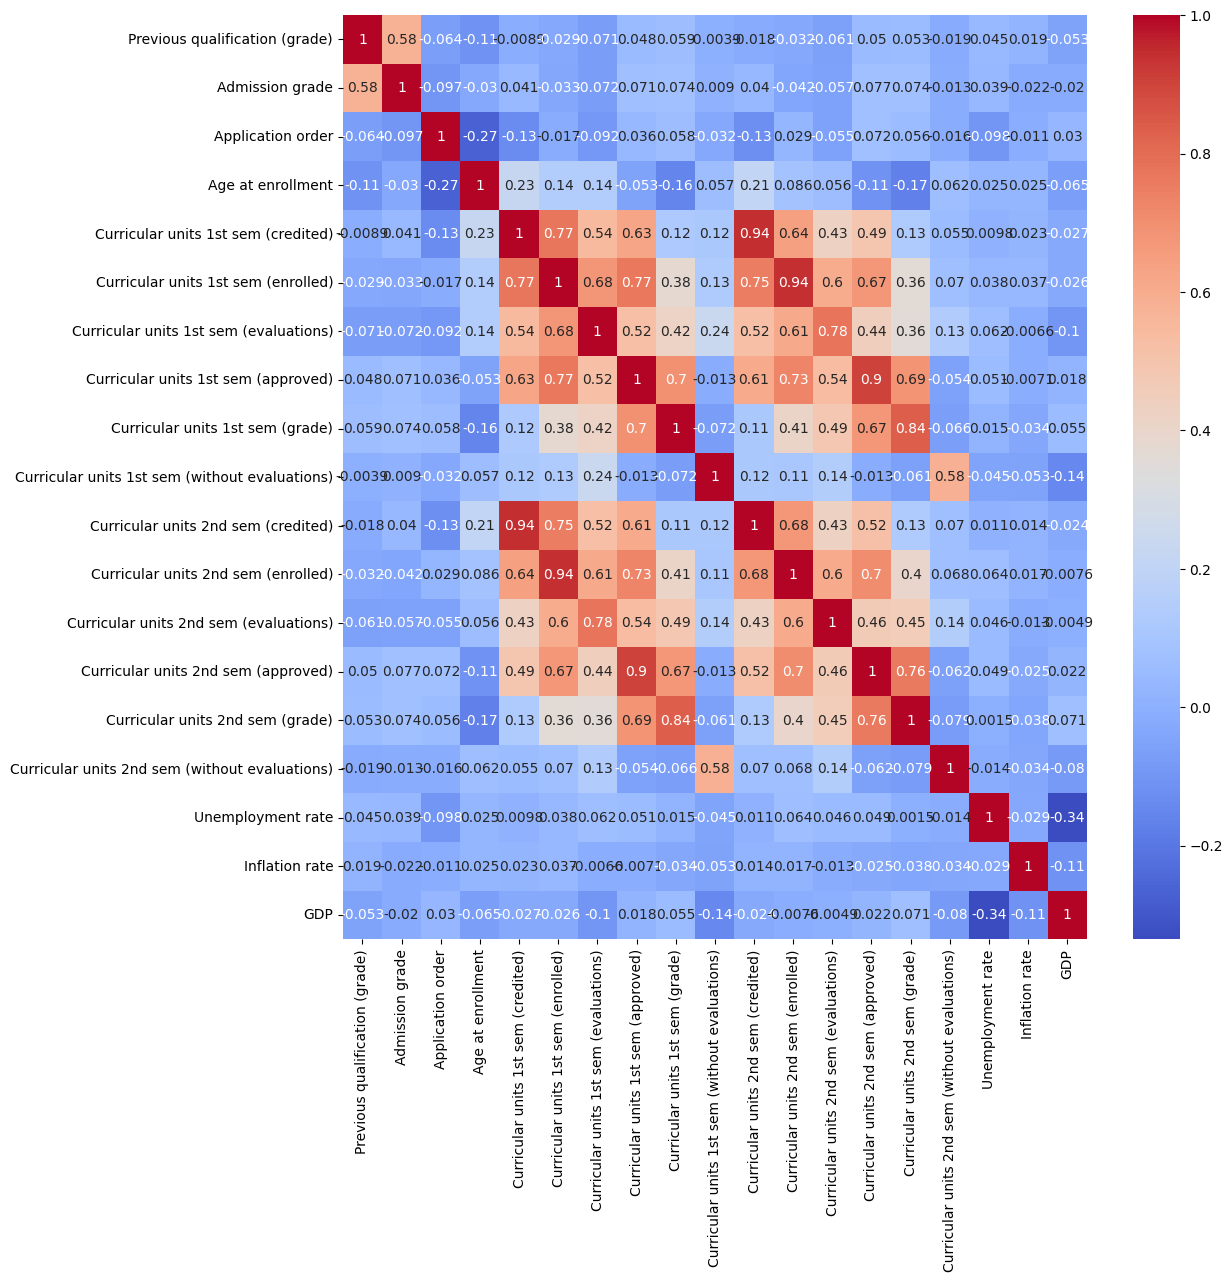

In [7]:
plt.figure(figsize=(12, 12))
sns.heatmap(X[col_std_scale + col_pt_scale + col_qt_scale].corr(), annot=True, cmap='coolwarm')

# Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y.to_numpy().ravel(), # to avoid DataConversionWarning
    test_size=0.3,
    stratify=y.to_numpy().ravel(),
    random_state=42
)

# K-Nearest Neighbors

In [9]:
# std + pt + qt
continuous_transformer = ColumnTransformer(
    [
        ('std', StandardScaler(), col_std_scale),
        ('pt', PowerTransformer(method='yeo-johnson'), col_pt_scale),
        ('qt', QuantileTransformer(output_distribution='uniform'), col_qt_scale),
    ]
).set_output(transform='pandas')


# continuous_transformer -> pca
continuous_data_pipeline = Pipeline(
    [
        ('continuous_transformer', continuous_transformer),
        ('pca', PCA(n_components=0.95))
    ]
)


# continuous_transformer_pca + ohe
preprocessor = ColumnTransformer(
    [
        ('continuous_transformer_pca', continuous_data_pipeline, col_std_scale + col_pt_scale + col_qt_scale),
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=.005), col_ohe)
    ],
    remainder='passthrough'
).set_output(transform='pandas')


# preprocessor -> model
# (((std + pt + qt) -> pca) + ohe) -> model
pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', KNeighborsClassifier())
    ]
)


param_distributions = {
    'model__n_neighbors': range(1, 51),
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'model__p': [1, 2]
}


cv = StratifiedKFold(
    n_splits=3, 
    shuffle=True, 
    random_state=42
)


random_search_pca_knn = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='f1_weighted',
    verbose=3,
    cv=cv,
    return_train_score=True
)


random_search_pca_knn.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END model__algorithm=auto, model__n_neighbors=13, model__p=2, model__weights=uniform;, score=(train=0.724, test=0.685) total time=   0.3s
[CV 2/3] END model__algorithm=auto, model__n_neighbors=13, model__p=2, model__weights=uniform;, score=(train=0.725, test=0.673) total time=   0.0s
[CV 3/3] END model__algorithm=auto, model__n_neighbors=13, model__p=2, model__weights=uniform;, score=(train=0.719, test=0.675) total time=   0.1s
[CV 1/3] END model__algorithm=auto, model__n_neighbors=31, model__p=2, model__weights=uniform;, score=(train=0.688, test=0.678) total time=   0.1s
[CV 2/3] END model__algorithm=auto, model__n_neighbors=31, model__p=2, model__weights=uniform;, score=(train=0.690, test=0.638) total time=   0.1s
[CV 3/3] END model__algorithm=auto, model__n_neighbors=31, model__p=2, model__weights=uniform;, score=(train=0.680, test=0.667) total time=   0.0s
[CV 1/3] END model__algorithm=auto, model__n_neighbors=

c:\Users\Deomary\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('continuous_transformer_pca',
                                                                               Pipeline(steps=[('continuous_transformer',
                                                                                                ColumnTransformer(transformers=[('std',
                                                                                                                                 StandardScaler(),
                                                                                                                                 ['Previous '
                                                                                                                                  'qualification '
                                                                                                                                  '(grade)',
                                                                                                                                  'Admissio...
                                                                                'qualification',
                                                                                "Father's "
                                                                                'qualification',
                                                                                "Mother's "
                                                                                'occupation',
                                                                                "Father's "
                                                                                'occupation'])])),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=100,
                   param_distributions={'model__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                                        'model__n_neighbors': range(1, 51),
                                        'model__p': [1, 2],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   return_train_score=True, scoring='f1_weighted', verbose=3)

In [10]:
print(f'best score: {random_search_pca_knn.best_score_}\n')
print(f'best params: {random_search_pca_knn.best_params_}\n')
print(classification_report(y_test, random_search_pca_knn.best_estimator_.predict(X_test)))

best score: 0.6876595855642901

best params: {'model__weights': 'uniform', 'model__p': 2, 'model__n_neighbors': 10, 'model__algorithm': 'brute'}

              precision    recall  f1-score   support

     Dropout       0.78      0.66      0.71       427
    Enrolled       0.41      0.27      0.33       238
    Graduate       0.75      0.92      0.82       663

    accuracy                           0.72      1328
   macro avg       0.65      0.61      0.62      1328
weighted avg       0.70      0.72      0.70      1328



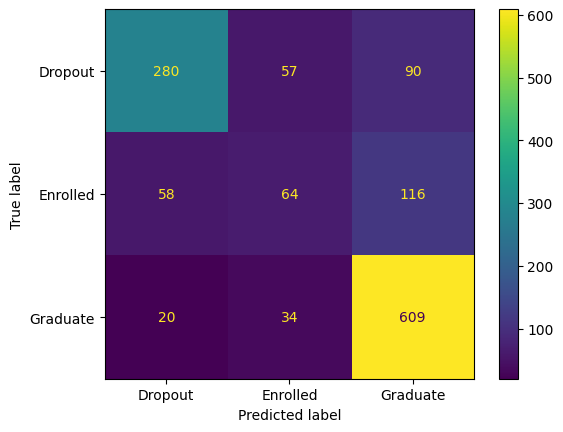

In [11]:
ConfusionMatrixDisplay.from_estimator(random_search_pca_knn.best_estimator_, X_test, y_test)

# Random Forest

In [12]:
preprocessor = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(sparse_output=False, handle_unknown='infrequent_if_exist', min_frequency=.005), col_ohe)
    ],
    remainder='passthrough'
).set_output(transform='pandas')


pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42))
    ]
)


param_distributions = {
    'model__n_estimators': stats.randint(10, 1500),
    'model__criterion': ['gini', 'entropy', 'log_loss'],
    'model__max_depth': stats.randint(1, 100),
    'model__min_samples_split': stats.loguniform(0.0001, .01),
    'model__min_samples_leaf': stats.loguniform(0.0001, .01),
    'model__max_features': ['sqrt', 'log2']
}


cv = StratifiedKFold(
    n_splits=3, 
    shuffle=True, 
    random_state=42
)


random_search_rf = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='f1_weighted',
    verbose=3,
    cv=cv,
    return_train_score=True
)


random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END model__criterion=log_loss, model__max_depth=87, model__max_features=sqrt, model__min_samples_leaf=0.0008025124754679913, model__min_samples_split=0.0027412154786089367, model__n_estimators=528;, score=(train=0.941, test=0.748) total time=   1.8s
[CV 2/3] END model__criterion=log_loss, model__max_depth=87, model__max_features=sqrt, model__min_samples_leaf=0.0008025124754679913, model__min_samples_split=0.0027412154786089367, model__n_estimators=528;, score=(train=0.944, test=0.739) total time=   1.9s
[CV 3/3] END model__criterion=log_loss, model__max_depth=87, model__max_features=sqrt, model__min_samples_leaf=0.0008025124754679913, model__min_samples_split=0.0027412154786089367, model__n_estimators=528;, score=(train=0.948, test=0.749) total time=   1.6s
[CV 1/3] END model__criterion=entropy, model__max_depth=7, model__max_features=sqrt, model__min_samples_leaf=0.003744848388807181, model__min_samples_split=0.00

c:\Users\Deomary\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                             min_frequency=0.005,
                                                                                             sparse_output=False),
                                                                               ['Marital '
                                                                                'Status',
                                                                                'Application '
                                                                                'mode',
                                                                                'Course',
                                                                                'Previous '
                                                                                'qualification',...
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F9FC8A4590>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F9FC8CAC90>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F9FC8A4FD0>},
                   return_train_score=True, scoring='f1_weighted', verbose=3)

In [13]:
print(f'best score: {random_search_rf.best_score_}\n')
print(f'best params: {random_search_rf.best_params_}\n')
print(classification_report(y_test, random_search_rf.best_estimator_.predict(X_test)))

best score: 0.7493820667135198

best params: {'model__criterion': 'log_loss', 'model__max_depth': 30, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 0.00041231075021729295, 'model__min_samples_split': 0.0016016710285196617, 'model__n_estimators': 235}

              precision    recall  f1-score   support

     Dropout       0.80      0.78      0.79       427
    Enrolled       0.63      0.29      0.40       238
    Graduate       0.79      0.96      0.86       663

    accuracy                           0.78      1328
   macro avg       0.74      0.67      0.68      1328
weighted avg       0.76      0.78      0.76      1328



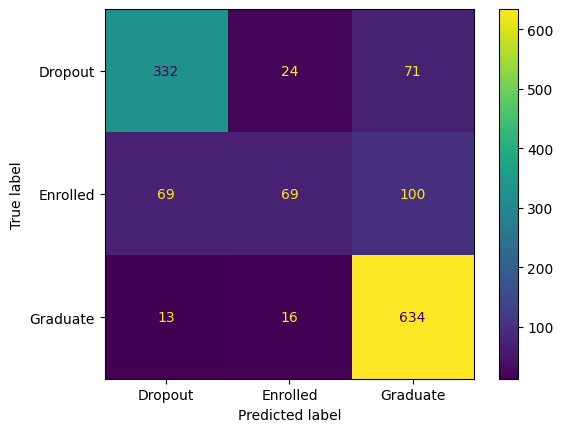

In [14]:
ConfusionMatrixDisplay.from_estimator(random_search_rf.best_estimator_, X_test, y_test)

# Boosted Trees (XGBoost)

In [15]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [16]:
bst = XGBClassifier()

param_distributions = {
    'n_estimators': stats.randint(50, 2000),
    'max_depth':  stats.randint(3, 10),
    'learning_rate':  stats.uniform(0.01, 0.4 - 0.01),  # Range from 0.01 to 0.3
    'subsample':  stats.uniform(0.5, 0.5),              # Range from 0.5 to 1.0
    'colsample_bytree':  stats.uniform(0.5, 0.5),       # Range from 0.5 to 1.0
    'gamma':  stats.loguniform(0.0001, 1),
    'reg_alpha':  stats.uniform(0, 5),
    'reg_lambda':  stats.uniform(0, 5)
}

cv = StratifiedKFold(
    n_splits=3, 
    shuffle=True, 
    random_state=42
)

random_search_xgb = RandomizedSearchCV(
    estimator=bst,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='f1_weighted',
    verbose=3,
    cv=cv,
    return_train_score=True
)

random_search_xgb.fit(X_train, y_train_encoded)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END colsample_bytree=0.9259714902511678, gamma=0.0062117511204899155, learning_rate=0.2652264927409176, max_depth=6, n_estimators=1652, reg_alpha=1.7496171725644805, reg_lambda=2.9643657290096916, subsample=0.5951265807241903;, score=(train=1.000, test=0.750) total time=   1.3s
[CV 2/3] END colsample_bytree=0.9259714902511678, gamma=0.0062117511204899155, learning_rate=0.2652264927409176, max_depth=6, n_estimators=1652, reg_alpha=1.7496171725644805, reg_lambda=2.9643657290096916, subsample=0.5951265807241903;, score=(train=1.000, test=0.748) total time=   1.4s
[CV 3/3] END colsample_bytree=0.9259714902511678, gamma=0.0062117511204899155, learning_rate=0.2652264927409176, max_depth=6, n_estimators=1652, reg_alpha=1.7496171725644805, reg_lambda=2.9643657290096916, subsample=0.5951265807241903;, score=(train=1.000, test=0.756) total time=   1.3s
[CV 1/3] END colsample_bytree=0.8213864264808857, gamma=0.000481639529835

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importan...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001F9FA4A77D0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F9FC9C8C50>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F9FC9CB010>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001F9FC99C3D0>},
                   return_train_score=True, scoring='f1_weighted', verbose=3)

In [17]:
print(f'best score: {random_search_xgb.best_score_}\n')
print(f'best params: {random_search_xgb.best_params_}\n')
print(classification_report(y_test, le.inverse_transform(random_search_xgb.best_estimator_.predict(X_test))))

best score: 0.7662687886273694

best params: {'colsample_bytree': 0.9490898399745439, 'gamma': 0.0014785939959187087, 'learning_rate': 0.03648591205330236, 'max_depth': 5, 'n_estimators': 915, 'reg_alpha': 4.737134004292686, 'reg_lambda': 4.8553648832400045, 'subsample': 0.9629721096037837}

              precision    recall  f1-score   support

     Dropout       0.81      0.74      0.77       427
    Enrolled       0.52      0.44      0.48       238
    Graduate       0.82      0.90      0.86       663

    accuracy                           0.77      1328
   macro avg       0.71      0.69      0.70      1328
weighted avg       0.76      0.77      0.76      1328



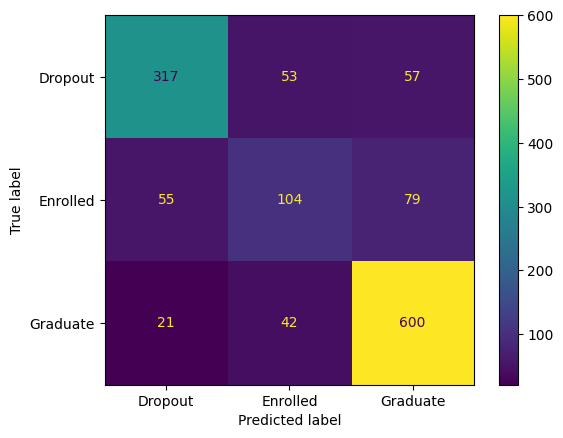

In [18]:
ConfusionMatrixDisplay.from_estimator(random_search_xgb.best_estimator_, X_test, y_test_encoded, display_labels=le.classes_)

# Summary

In [19]:
def highlight_max(data, hl_index=False, color='green'):
    if hl_index:
        is_max = data.groupby(level=1).transform('max') == data
    else:
        is_max = data.max() == data
    return [f'background-color: {color}' if v else '' for v in is_max]

In [20]:
le.inverse_transform(random_search_xgb.predict(X_test))

array(['Dropout', 'Graduate', 'Dropout', ..., 'Graduate', 'Enrolled',
       'Graduate'], dtype=object)

In [21]:
le.classes_

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

In [22]:
names = [
    'K-Nearest Neighbors',
    'Random Forest',
    'XGboost',
]

grid_results = [
    random_search_pca_knn,
    random_search_rf,
    random_search_xgb,
]

dfs = []

for name, result in zip(names, grid_results):
    df = (
            pd.DataFrame(
                classification_report(
                    y_test,
                    result.best_estimator_.predict(X_test) if name != 'XGboost' else le.inverse_transform(result.predict(X_test)), 
                    output_dict=True
                )
            )
            .map(round, ndigits=4)
            .drop(index=['support'])
    )
    df.index = pd.MultiIndex.from_product([[name], df.index])

    dfs.append(df)

df_concat = pd.concat(dfs)
df_styled = df_concat.style.apply(
    highlight_max, 
    subset=pd.IndexSlice[:, ['Dropout', 'Enrolled', 'Graduate', 'accuracy', 'macro avg', 'weighted avg']],
    hl_index=True,
)
df_styled

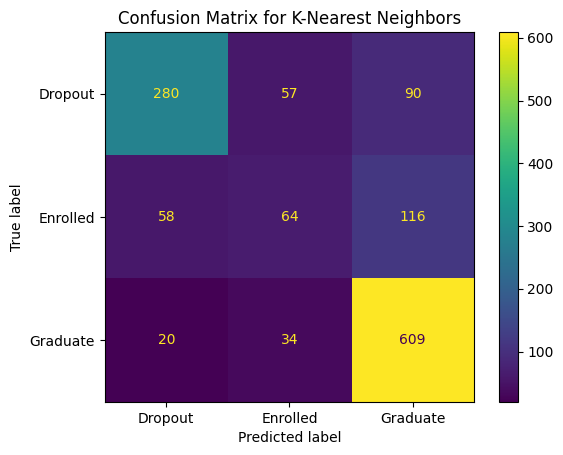

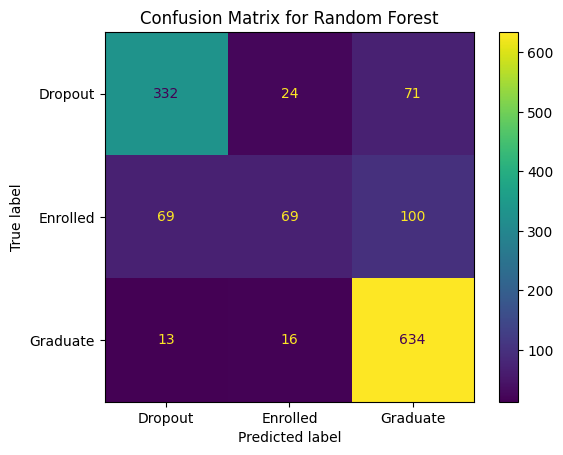

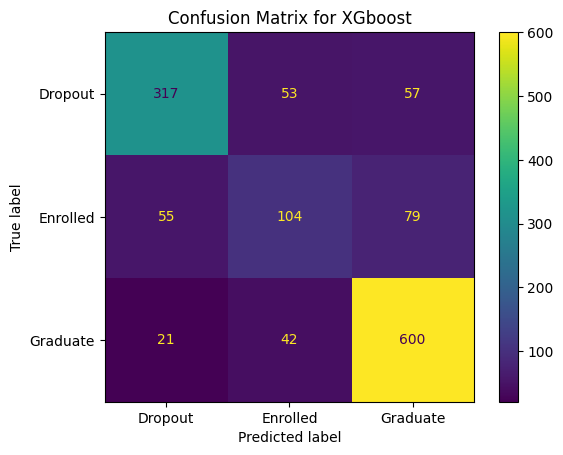

In [23]:
for name, result in zip(names, grid_results):
    if name == 'XGboost':
        ConfusionMatrixDisplay.from_estimator(result.best_estimator_, X_test, y_test_encoded, display_labels=le.classes_)
    else:
        ConfusionMatrixDisplay.from_estimator(result.best_estimator_, X_test, y_test)
    plt.title(f'Confusion Matrix for {name}')

Since our goal is to have a balanced score in being able to predict all classes (Dropout, Enrolled, and Graduate), our main metric is f1_weighted. RandomForest was able to have a good f1 score for Dropout and Graduate but lower score for Enrolled, while XGBboost Classifier resulted to better balance for the 3 classes.